### 1. 基本模型情况测试
在基本情况下，假定AI技术特征、学校创新氛围、风险容忍度、大众宣传渠道、教师培训等影响因素都是保持一般的情况，即不积极又不抵触。

```{python}
# 相对优势，兼容性，复杂性，可试性，可见性
ei_ai_f = [0.50,0.50,0.50,0.50,0.50]
ei_sia = 0.25
ei_srt = 0.50
ei_mass = 0.50
ei_tt = 0.40
```

#### 1.1 导入Agent与Model类和其他基本类

In [1]:
import matplotlib.pyplot as plt

from dit_model import *

#### 1.2 模型初始化

In [180]:
# np.set_printoptions(precision=3)
# x = np.array([1.23456])
# x

array([1.235])

In [2]:
# model1 = DIT4AI(14, [0.45, 0.45, 0.30, 0.45, 0.45], 0.35, 0.25, 0.20, 0.20)
model1 = DIT4AI(14, [0.30, 0.30, 0.70, 0.30, 0.30], -0.2, 0.00, 0.00, 0.00)
model1.agent_type_nums
# 24, 91, 69, 6, 6
# 26, 88, 76, 5, 1

[35, 72, 75, 11, 3]

In [88]:
print("类型分布：" + str(model1.agent_type_nums))
print("初始的整体创新意识：" + str(model1.model_bs_ia))
print("初始的整体AI接纳度：" + str(model1.model_bs_ai_act))
print("初始的整体AI行为意向：" + str(model1.model_bs_ai_bi))
print("初始的整体AI教学成效：" + str(model1.model_ai_te))
print("初始的整体AI风险水平：" + str(model1.model_bs_ai_alpha))

类型分布：[28, 81, 76, 10, 1]
初始的整体创新意识：-0.02461488485246222
初始的整体AI接纳度：-0.02097553621908054
初始的整体AI行为意向：-0.02461488485246222
初始的整体AI教学成效：0.0
初始的整体AI风险水平：0.0


#### 1.3 模型仿真

In [109]:
# 20年的发展情况
for i in range(120):
    model1.step()

#### 1.4 结果分析

**模型整体参数结果（120步）**

In [110]:
model1_result = model1.datacollector.get_model_vars_dataframe()
model1_result
# model1_result["model_bs_ia"][0]

,agent_type1,agent_type2,agent_type3,agent_type4,agent_type5,model_bs_ia,model_bs_ai_act,model_bs_ai_bi,model_bs_ai_alpha,model_ai_te
0,37,85,62,11,1,-0.064309,-0.044462,-0.054789,0.641741,-0.620525
1,41,91,52,9,3,-0.089116,-0.051981,-0.064082,0.655539,-0.608202
2,41,91,52,9,3,-0.114121,-0.060075,-0.075042,0.668222,-0.597679
3,45,86,53,9,3,-0.138175,-0.070756,-0.087312,0.681263,-0.590021
4,33,89,62,9,3,-0.161829,-0.083233,-0.103585,0.693745,-0.586507
...,...,...,...,...,...,...,...,...,...,...
115,167,16,6,4,3,-0.782216,-0.851926,-0.856589,0.914635,-0.890490
116,167,17,5,4,3,-0.786608,-0.850543,-0.854806,0.915746,-0.888237
117,167,17,4,5,3,-0.787583,-0.852178,-0.860209,0.916453,-0.892391
118,168,17,4,4,3,-0.786929,-0.851524,-0.860260,0.917154,-0.891017


In [112]:
# 数据保存
model1_result.to_csv("simulate_data/model1_result_anti.csv")

**五种类型教师Agent的数量变化**

在这种模式下，大概100月（10年左右）的时候就稳定了，五种类型的数据差距不大

模型最终的数量：[43, 45, 25, 37, 46]


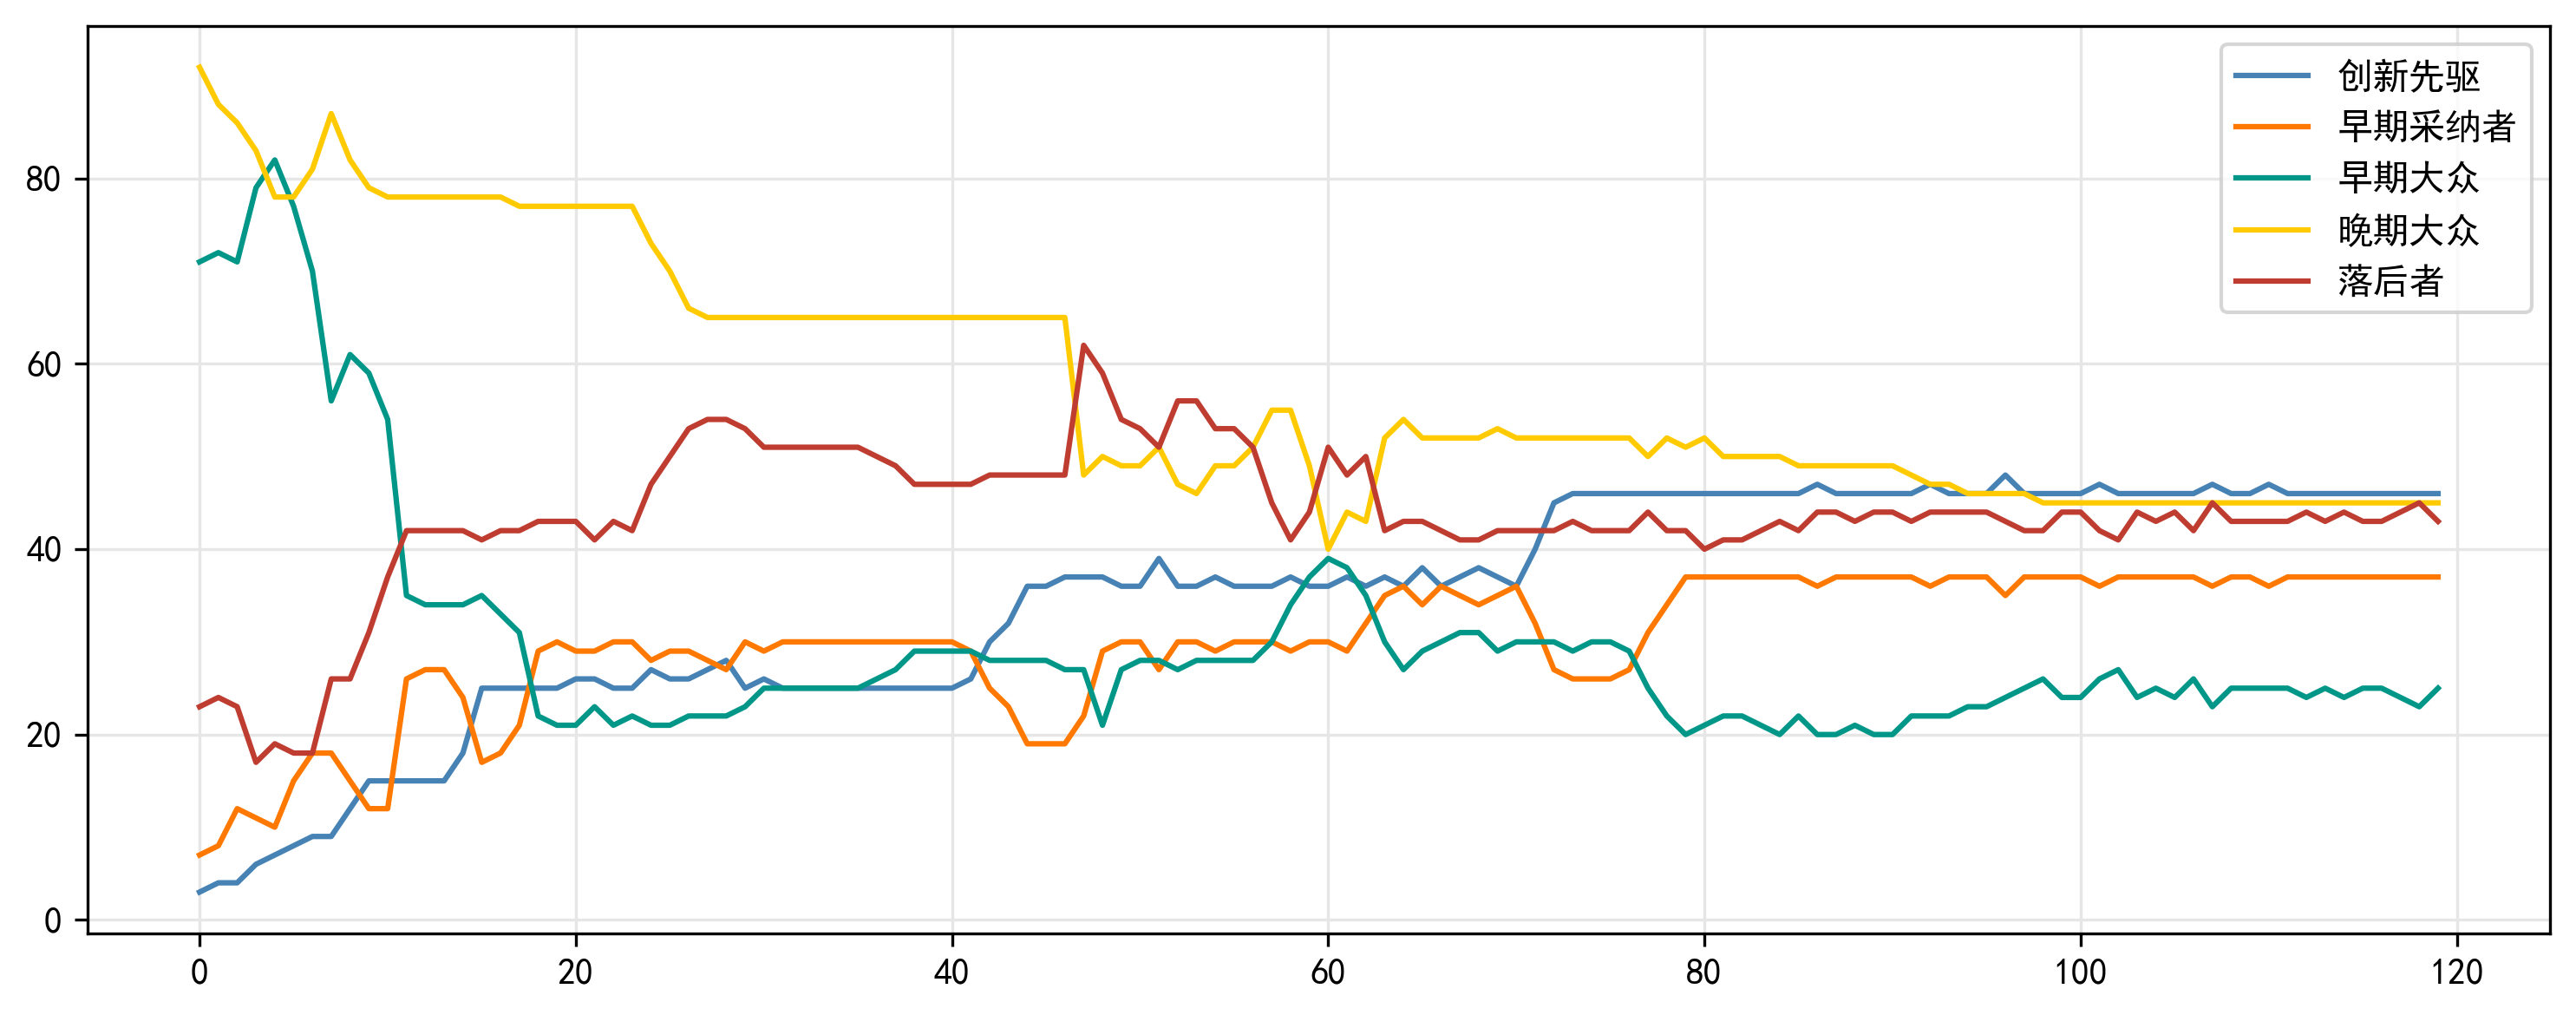

In [20]:
print("模型最终的数量：" + str(model1.agent_type_nums))
plt.figure(figsize=(10, 4), dpi=300)
# 支持中文设置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(range(120), model1_result["agent_type5"], "-", label='创新先驱', color="steelblue")
plt.plot(range(120), model1_result["agent_type4"], "-", label='早期采纳者', color="#ff7800")
plt.plot(range(120), model1_result["agent_type3"], "-", label='早期大众', color="#009688")
plt.plot(range(120), model1_result["agent_type2"], "-", label='晚期大众', color="#ffcb00")
plt.plot(range(120), model1_result["agent_type1"], "-", label='落后者', color="#BF3D30")
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(color="#E6E6E6")
plt.tight_layout()

**模型总体参数变化情况**

> 该部分可以通过批量运行后，得出一个带置信区间的图，看看是不是会稳定在这附近

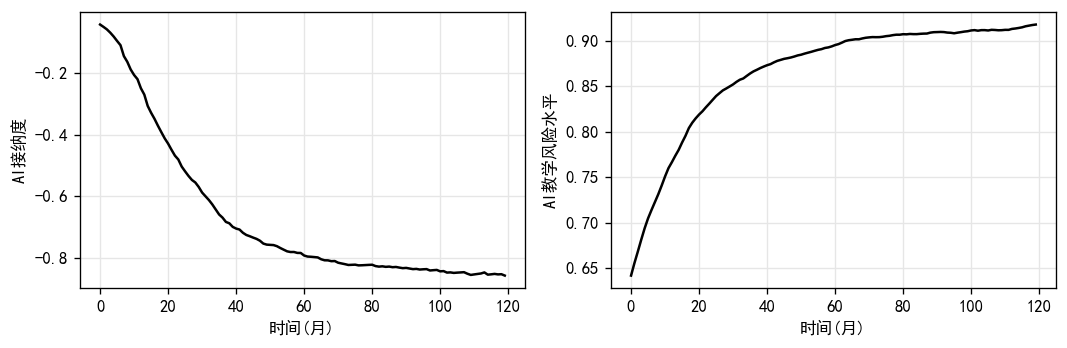

In [111]:
plt.figure(figsize=(9, 3), dpi=120)
plt.rcParams['axes.unicode_minus'] = False  #显示中文负号
plt.rcParams['font.sans-serif'] = ['SimHei']

plot1 = plt.subplot(121)
plot1.plot(range(120), model1_result["model_bs_ai_act"], color="black")
plt.grid(color="#E6E6E6")
plt.xlabel("时间(月)", color="Black")
plt.ylabel("AI接纳度", color="Black")

plot2 = plt.subplot(122)
plot2.plot(range(120), model1_result["model_bs_ai_alpha"], color="black")
plt.grid(color="#E6E6E6")
plt.xlabel("时间(月)", color="Black")
plt.ylabel("AI教学风险水平", color="Black")

plt.tight_layout()
# plt.savefig('images/S曲线检验.png')

**整体创新意识的空间变化情况**

在14*14的网格上呈现整体的创新意识热力图

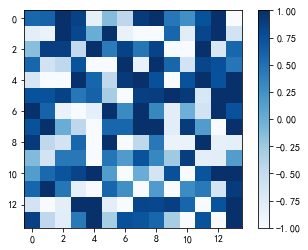

In [12]:
agent_bs_ia = np.zeros((model1.grid.width, model1.grid.height))
for cell in model1.grid.coord_iter():
    cell_content, x, y = cell
    agent_bs_ia[x][y] = cell_content.bs.bs_ia

# 创新意图热力图
plt.imshow(agent_bs_ia, cmap='Blues')
plt.colorbar()
plt.show()

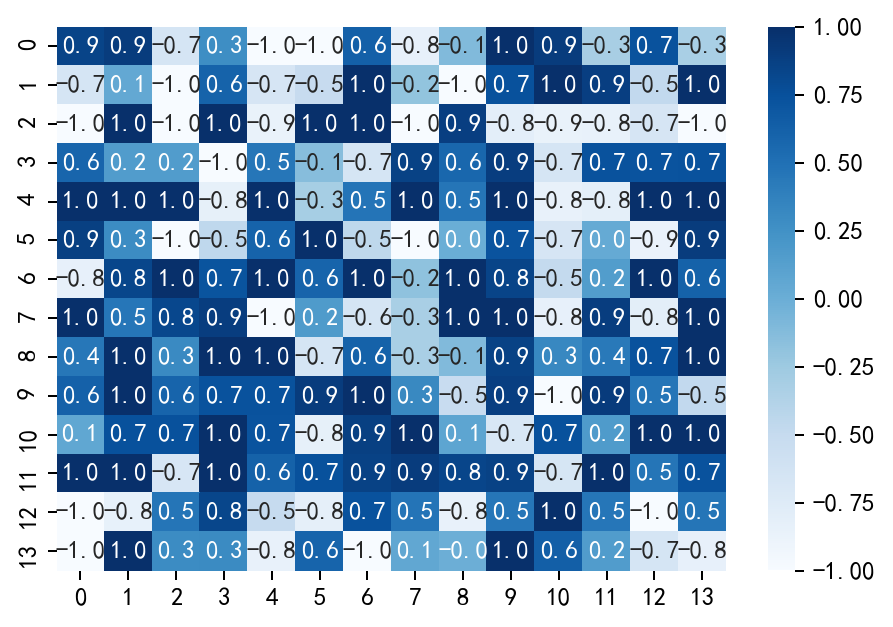

In [65]:
# 热力图显示数字
import seaborn as sns

plt.figure(dpi=180)
sns.heatmap(data=agent_bs_ia, cmap="Blues", annot=True, fmt='.1f')

**AI风险的整体情况**

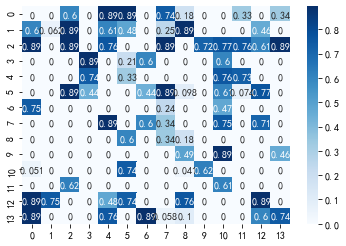

In [69]:
agent_ai_alpha = np.zeros((model1.grid.width, model1.grid.height))
for cell in model1.grid.coord_iter():
    cell_content, x, y = cell
    agent_ai_alpha[x][y] = cell_content.bs.bs_alpha

# AI风险热力图
sns.heatmap(data=agent_ai_alpha, cmap="Blues", annot=True)
plt.show()

#### 1.5 批量仿真：稳定性分析

In [13]:
from mesa.batchrunner import BatchRunner

**模型设定**

In [17]:
fixed_params_model_1 = {
    "ei_ai_f": [0.62, 0.40, 0.60, 0.52, 0.43],
    "ei_sia": 0.25,
    "ei_srt": 0.50,
    "ei_mass": 0.50,
    "ei_tt": 0.40
}

variable_params_model_1 = {
    "n": [14],
}

batch_run_model_1 = BatchRunner(
    DIT4AI,
    fixed_parameters=fixed_params_model_1,
    variable_parameters=variable_params_model_1,
    iterations=100,
    max_steps=120,
    model_reporters={
        "model_final_bs_ia": model_final_bs_ia
    }
)

**批量仿真**

In [18]:
# 开始仿真
#batch_run_model_1.run_all()

100it [1:18:34, 47.15s/it]


**100次仿真的模型结果：创新意识BS_IA分布情况**

在模型1的情况下，最终的BS_IA均值为0.18，基本分布在0.10~0.25之间

In [79]:
model1_batch_result = batch_run_model_1.get_model_vars_dataframe()

In [79]:
# 数据保存
model1_batch_result.to_csv("simulate_data/model1_batch_result.csv")

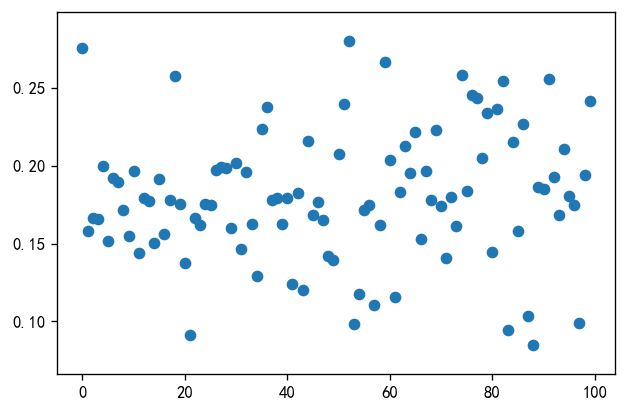

0.18073977400112426

In [158]:
plt.figure(dpi=120)
plt.scatter(range(100), model1_batch_result["model_final_bs_ia"])
plt.show()
sum(model1_batch_result["model_final_bs_ia"]) / 100

**100次模拟后，创新意识BS_IA的置信区间绘制**

In [174]:
model_100_result = batch_run_model_1.get_collector_model()
model_bs_ia_mean = []  # 均值
model_bs_ia_max = []  # 最大值
model_bs_ia_min = []  # 最小值

OrderedDict()


In [170]:
each_max = 0
each_min = 1
each_sum = 0
for i in range(120):  #一次仿真120步
    for j in range(100):  #100次仿真，100种情况
        current = model_100_result[(14, j)]["model_bs_ia"][i]
        each_sum += current
        if each_max < current:
            each_max = current
        if each_min > current:
            each_min = current
    # 写入最大最小与均值
    model_bs_ia_mean.append(each_sum / 100)
    model_bs_ia_min.append(each_min)
    model_bs_ia_max.append(each_max)
    each_min = 1
    each_max = 0
    each_sum = 0

KeyError: (14, 0)

In [171]:
# 结果：均值，最大，最小
print(model_bs_ia_mean)
print(model_bs_ia_max)
print(model_bs_ia_min)
len(model_bs_ia_mean)

[]
[]
[]


0

In [164]:
#置信区间计算
for i in range(120):  #一次仿真120步
    diff = 0
    for j in range(100):  #100次仿真，100种情况
        current = model_100_result[(14, j)]["model_bs_ia"][i]
        diff += current - model_bs_ia_mean[i]

array([1478.86871685, 1462.46944099, 1441.24098008, 1410.9857983 ,
       1371.4880441 , 1324.96229864, 1271.0862783 , 1213.55485862,
       1151.61797692, 1094.40210081, 1036.81584697,  981.80852619,
        926.07598468,  878.69649637,  837.21089892,  799.38473198,
        759.46957273,  724.07481269,  687.01631531,  659.27524303,
        627.61470277,  600.54758703,  573.73864683,  555.93403389,
        530.00963359,  500.56686578,  479.16408942,  459.44502985,
        438.30974013,  413.44423678,  391.31969888,  368.32767039,
        348.80144809,  329.70012582,  305.59202741,  282.9075837 ,
        261.94102703,  242.68823321,  212.97662224,  190.88231788,
        165.90197659,  139.77642727,  128.11496296,  102.5781657 ,
         86.77668047,   63.94461249,   51.03156248,   32.01581937,
         10.3488992 ,   -9.07962217,  -30.29692489,  -43.02404083,
        -59.2217698 ,  -75.82364746,  -94.81598421, -115.66286818,
       -138.56410963, -155.13285054, -174.48587602, -188.27304

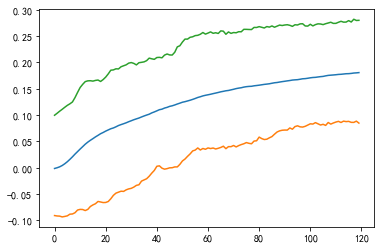

In [61]:
# 绘图
plt.plot(range(120), model_bs_ia_mean)
plt.plot(range(120), model_bs_ia_min)
plt.plot(range(120), model_bs_ia_max)
plt.show()

### 2. 不同模型设定情况的大批量仿真

修改AI技术特征、学校创新氛围、风险容忍度、大众宣传渠道、教师培训中的数值，分析最终创新意识BS_IA的变化趋势

#### 2.1 学校创新氛围EI_SIA的影响
ei_sia = [-1.00 ~ 1.00]

**模型设定**

In [3]:
fixed_params_model_2 = {
    "n": 14,
    "ei_ai_f": [0.50, 0.50, 0.50, 0.50, 0.50],
    "ei_srt": 0.50,
    "ei_mass": 0.50,
    "ei_tt": 0.40
}

variable_params_model_2 = {
    "ei_sia": np.arange(-1.00, 1.00, 0.5)
}

batch_run_model_2 = BatchRunner(
    DIT4AI,
    fixed_parameters=fixed_params_model_2,
    variable_parameters=variable_params_model_2,
    iterations=1,
    max_steps=120,
    model_reporters={
        "model_final_bs_ia": model_final_bs_ia
    }
)

In [4]:
# 开始仿真
batch_run_model_2.run_all()

4it [04:04, 61.17s/it]


In [4]:
model2_batch_result = batch_run_model_2.get_model_vars_dataframe()
model2_batch_result

,ei_sia,Run,model_final_bs_ia,n,ei_ai_f,ei_srt,ei_mass,ei_tt
0,-1.000000e+00,0,-0.999354,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.5,0.5,0.4
1,-9.500000e-01,1,-0.999535,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.5,0.5,0.4
2,-9.000000e-01,2,-0.994518,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.5,0.5,0.4
3,-8.500000e-01,3,-0.992437,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.5,0.5,0.4
4,-8.000000e-01,4,-0.980477,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.5,0.5,0.4
5,-7.500000e-01,5,-0.984340,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.5,0.5,0.4
6,-7.000000e-01,6,-0.979999,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.5,0.5,0.4
7,-6.500000e-01,7,-0.973733,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.5,0.5,0.4
8,-6.000000e-01,8,-0.969126,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.5,0.5,0.4
9,-5.500000e-01,9,-0.959063,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.5,0.5,0.4


In [5]:
model2_batch_detail_result = batch_run_model_2.get_collector_model()

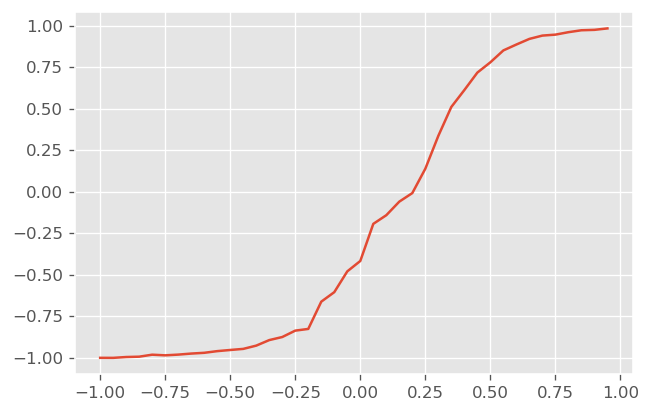

In [6]:
plt.figure(dpi=120)
plt.style.use('ggplot')
plt.plot(model2_batch_result["ei_sia"], model2_batch_result["model_final_bs_ia"])
plt.show()

In [7]:
# 其他数据分析
model2_each_model = batch_run_model_2.get_collector_model()
model2_each_model[(-1.0, 0)]

,agent_type1,agent_type2,agent_type3,agent_type4,agent_type5,model_bs_ia,model_bs_ai_act,model_bs_ai_bi,model_bs_ai_alpha,model_ai_te
0,35,86,69,4,2,-0.074563,-0.003198,-0.004369,0.707327,-0.668269
1,39,90,61,4,2,-0.154220,-0.008703,-0.011812,0.731726,-0.657831
2,38,99,53,5,1,-0.228094,-0.014406,-0.021096,0.750939,-0.646384
3,56,97,37,5,1,-0.301614,-0.045271,-0.071492,0.764940,-0.683097
4,66,93,35,1,1,-0.373804,-0.159623,-0.168958,0.777537,-0.763923
...,...,...,...,...,...,...,...,...,...,...
115,196,0,0,0,0,-0.999522,-1.000000,-1.000000,0.999900,-0.993727
116,196,0,0,0,0,-0.999442,-1.000000,-1.000000,0.999836,-0.993727
117,196,0,0,0,0,-0.999280,-1.000000,-1.000000,0.999707,-0.993726
118,196,0,0,0,0,-0.998960,-1.000000,-1.000000,0.999450,-0.993724


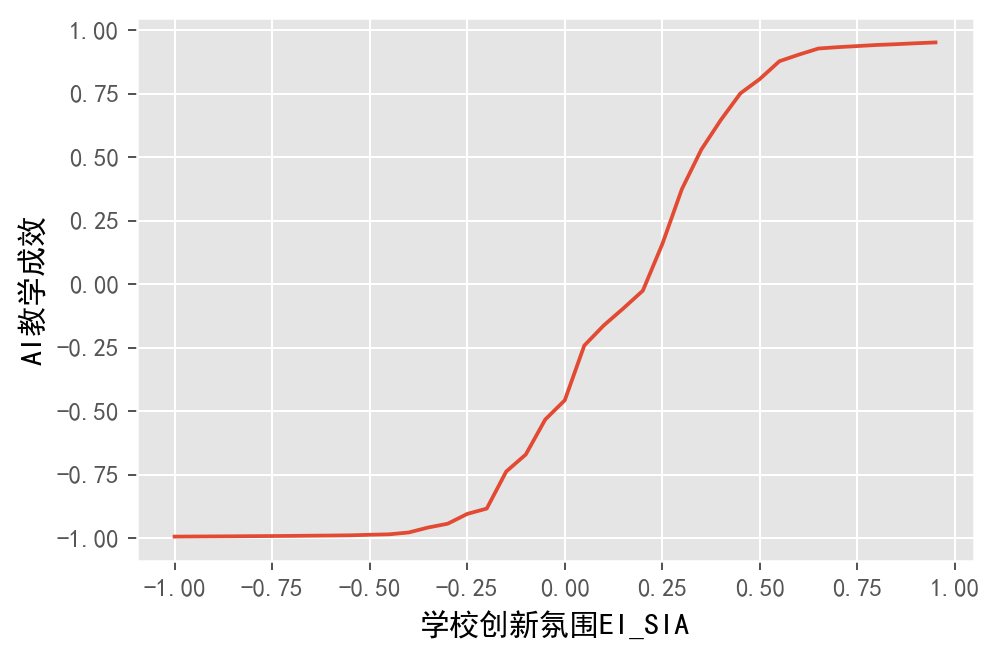

In [9]:
# AI 接纳度
model2_bs_ai_act = []
for i in model2_each_model:
    model2_bs_ai_act.append(model2_each_model[i]["model_ai_te"][119])

# 绘图
plt.figure(dpi=120)
plt.rcParams['axes.unicode_minus'] = False  #显示中文负号
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.style.use('ggplot')
plt.plot(model2_batch_result["ei_sia"], model2_bs_ai_act)
plt.ylabel("AI教学成效", color="Black")
plt.xlabel("学校创新氛围EI_SIA", color="black")
plt.show()

#### 2.2 学校风险容忍度EI_SRt的影响
ei_srt = [0.00 ~ 1.00]

In [82]:
fixed_params_model_3 = {
    "n": 14,
    "ei_ai_f": [0.62, 0.40, 0.60, 0.52, 0.43],
    "ei_sia": 0.25,
    "ei_mass": 0.50,
    "ei_tt": 0.40
}

variable_params_model_3 = {
    "ei_srt": np.arange(0.00, 1.00, 0.03)
}

batch_run_model_3 = BatchRunner(
    DIT4AI,
    fixed_parameters=fixed_params_model_3,
    variable_parameters=variable_params_model_3,
    iterations=1,
    max_steps=120,
    model_reporters={
        "model_final_bs_ia": model_final_bs_ia
    }
)

In [83]:
#batch_run_model_3.run_all()

34it [28:52, 50.96s/it]


In [89]:
model3_batch_result = batch_run_model_3.get_model_vars_dataframe()
model3_batch_result

,ei_srt,Run,model_final_bs_ia,n,ei_ai_f,ei_sia,ei_mass,ei_tt
0,0.00,0,-0.006657,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
1,0.03,1,-0.206687,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
2,0.06,2,0.031482,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
3,0.09,3,-0.031372,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
4,0.12,4,-0.026209,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
5,0.15,5,-0.051920,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
6,0.18,6,-0.033722,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
7,0.21,7,0.008333,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
8,0.24,8,0.026218,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
9,0.27,9,0.185276,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4


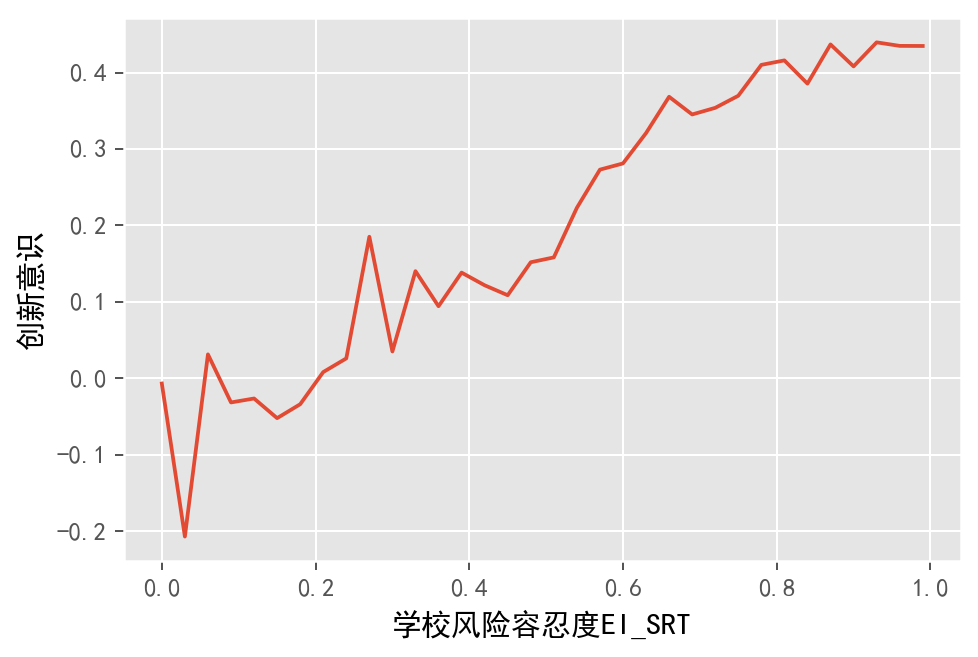

In [210]:
plt.figure(dpi=180)
plt.rcParams['axes.unicode_minus'] = False  #显示中文负号
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.style.use('ggplot')
plt.plot(model3_batch_result["ei_srt"], model3_batch_result["model_final_bs_ia"])
plt.ylabel("创新意识", color="Black")
plt.xlabel("学校风险容忍度EI_SRT", color="Black")
plt.show()

In [211]:
# 其他数据分析
model3_each_model = batch_run_model_3.get_collector_model()
model3_each_model

OrderedDict([((0.0, 0),
                   agent_type1  agent_type2  agent_type3  agent_type4  agent_type5  \
              0             32           74           80            7            3   
              1             30           80           76            6            4   
              2             30           81           71           10            4   
              3             29           79           71           13            4   
              4             27           74           78           12            5   
              ..           ...          ...          ...          ...          ...   
              115           58           44           26           32           36   
              116           57           43           28           33           35   
              117           59           42           27           33           35   
              118           61           41           26           33           35   
              119           61

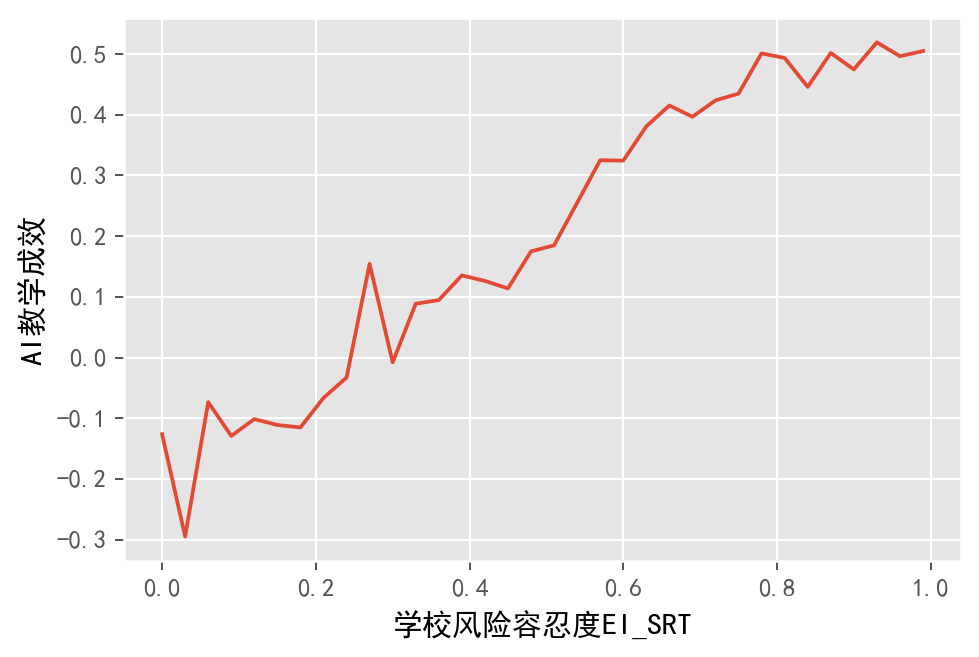

In [225]:
# AI 接纳度
model3_bs_ai_act = []
for i in model3_each_model:
    model3_bs_ai_act.append(model3_each_model[i]["model_ai_te"][119])

# 绘图
plt.figure(dpi=180)
plt.rcParams['axes.unicode_minus'] = False  #显示中文负号
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.style.use('ggplot')
plt.plot(model3_batch_result["ei_srt"], model3_bs_ai_act)
plt.ylabel("AI教学成效", color="Black")
plt.xlabel("学校风险容忍度EI_SRT", color="black")
plt.show()


#### 2.3 教师培训EI_TT的影响
ei_tt = [0.00 ~ 1.00]

In [17]:
fixed_params_model_4 = {
    "n": 14,
    "ei_ai_f": [0.50, 0.50, 0.50, 0.50, 0.50],
    "ei_sia": 0.30,
    "ei_srt": 0.50,
    "ei_mass": 0.50
}

variable_params_model_4 = {
    "ei_tt": np.arange(0.00, 1.00, 0.2)
}

batch_run_model_4 = BatchRunner(
    DIT4AI,
    fixed_parameters=fixed_params_model_4,
    variable_parameters=variable_params_model_4,
    iterations=1,
    max_steps=120,
    model_reporters={
        "model_bs_ia": model_final_bs_ia,
        "model_bs_ai_act": model_final_bs_ai_act,
        "model_bs_ai_bi": model_final_bs_ai_bi,
        "model_bs_ai_alpha": model_final_bs_ai_alpha,
        "model_ai_te": model_final_ai_te
    }
)

In [18]:
batch_run_model_4.run_all()

5it [04:21, 52.28s/it]


In [19]:
model4_batch_result = batch_run_model_4.get_model_vars_dataframe()
model4_batch_result

,ei_tt,Run,model_ai_te,model_bs_ai_act,model_bs_ai_alpha,model_bs_ai_bi,model_bs_ia,n,ei_ai_f,ei_sia,ei_srt,ei_mass
0,0.0,0,0.087144,0.167711,0.407103,0.170768,0.169812,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.3,0.5,0.5
1,0.2,1,0.303660,0.343956,0.212918,0.339374,0.284701,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.3,0.5,0.5
2,0.4,2,0.315139,0.350827,0.189051,0.343151,0.295636,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.3,0.5,0.5
3,0.6,3,0.396991,0.439334,0.166294,0.444846,0.376111,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.3,0.5,0.5
4,0.8,4,0.416325,0.453309,0.157140,0.456092,0.380595,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.3,0.5,0.5


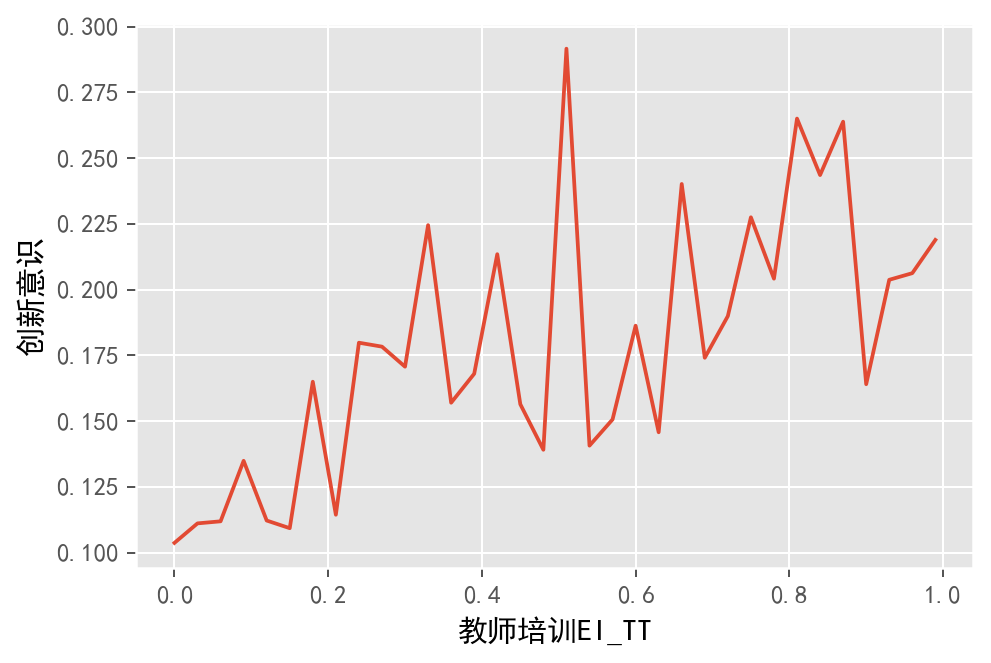

In [215]:
plt.figure(dpi=180)
plt.rcParams['axes.unicode_minus'] = False  #显示中文负号
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.style.use('ggplot')
plt.plot(model4_batch_result["ei_tt"], model4_batch_result["model_final_bs_ia"])
plt.xlabel("教师培训EI_TT", color="Black")
plt.ylabel("创新意识", color="Black")
plt.show()

In [216]:
# 其他数据分析
model4_each_model = batch_run_model_4.get_collector_model()
model4_each_model

OrderedDict([((0.0, 0),
                   agent_type1  agent_type2  agent_type3  agent_type4  agent_type5  \
              0             34           68           81            9            4   
              1             36           65           80            9            6   
              2             35           64           77           14            6   
              3             28           65           81           16            6   
              4             25           71           76           15            9   
              ..           ...          ...          ...          ...          ...   
              115           43           46           35           37           35   
              116           43           46           35           38           34   
              117           45           43           36           38           34   
              118           42           48           34           34           38   
              119           40

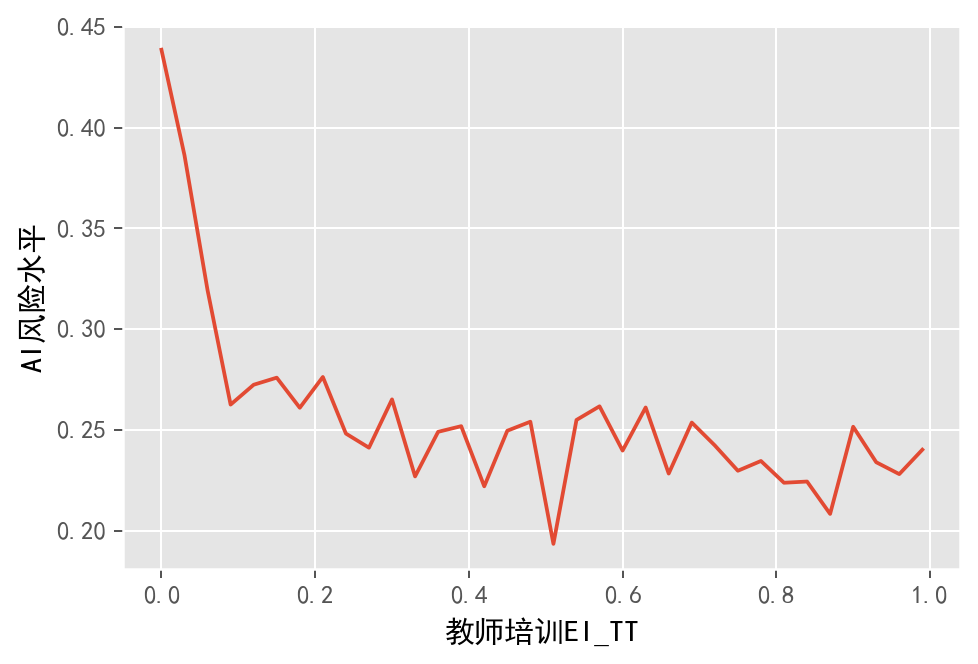

In [230]:
# AI 接纳度
model4_bs_ai_act = []
for i in model4_each_model:
    model4_bs_ai_act.append(model4_each_model[i]["model_bs_ai_alpha"][119])

# 绘图
plt.figure(dpi=180)
plt.rcParams['axes.unicode_minus'] = False  #显示中文负号
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.style.use('ggplot')
plt.plot(model4_batch_result["ei_tt"], model4_bs_ai_act)
plt.ylabel("AI风险水平", color="Black")
plt.xlabel("教师培训EI_TT", color="black")
plt.show()

#### 2.4 大众渠道宣传EI_MASS的影响
ei_mass = [0.00 ~ 1.00]

In [102]:
fixed_params_model_5 = {
    "n": 14,
    "ei_ai_f": [0.62, 0.40, 0.60, 0.52, 0.43],
    "ei_sia": 0.25,
    "ei_srt": 0.50,
    "ei_tt": 0.40,
}

variable_params_model_5 = {
    "ei_mass": np.arange(0.00, 1.00, 0.03)
}

batch_run_model_5 = BatchRunner(
    DIT4AI,
    fixed_parameters=fixed_params_model_5,
    variable_parameters=variable_params_model_5,
    iterations=1,
    max_steps=120,
    model_reporters={
        "model_final_bs_ia": model_final_bs_ia
    }
)

In [ ]:
#batch_run_model_5.run_all()

27it [28:59, 79.97s/it]

In [109]:
model5_batch_result = batch_run_model_5.get_model_vars_dataframe()
model5_batch_result

,ei_mass,Run,model_final_bs_ia,n,ei_ai_f,ei_sia,ei_srt,ei_tt
0,0.00,0,0.136601,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
1,0.03,1,0.162247,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
2,0.06,2,0.169672,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
3,0.09,3,0.057903,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
4,0.12,4,0.102601,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
5,0.15,5,0.137811,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
6,0.18,6,0.186814,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
7,0.21,7,0.217443,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
8,0.24,8,0.188393,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4
9,0.27,9,0.153299,14,"[0.62, 0.4, 0.6, 0.52, 0.43]",0.25,0.5,0.4


Text(0, 0.5, '创新意识')

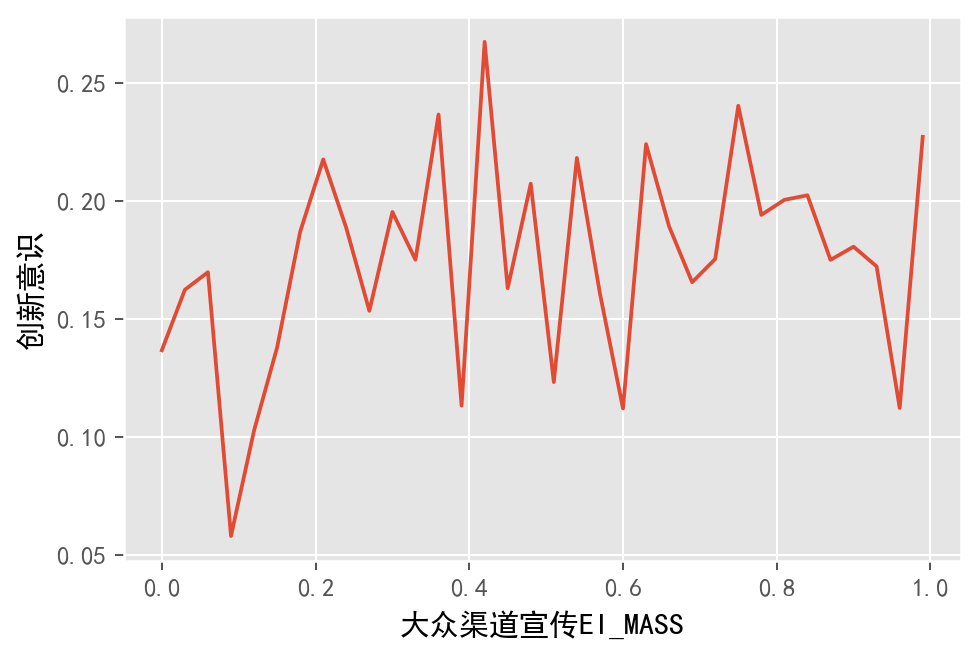

In [232]:
plt.figure(dpi=180)
plt.rcParams['axes.unicode_minus'] = False  #显示中文负号
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.style.use('ggplot')
plt.plot(model5_batch_result["ei_mass"], model5_batch_result["model_final_bs_ia"])
plt.xlabel("大众渠道宣传EI_MASS", color="Black")
plt.ylabel("创新意识", color="Black")

In [60]:
# 其他数据分析
model5_each_model = batch_run_model_5.get_collector_model()
# AI 接纳度
model5_bs_ai_act = []
for i in model5_each_model:
    model5_bs_ai_act.append(model5_each_model[i]["model_ai_te"][119])

# 绘图
plt.figure(dpi=180)
plt.rcParams['axes.unicode_minus'] = False  #显示中文负号
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.style.use('ggplot')
plt.plot(model5_batch_result["ei_mass"], modeal5_bs_ai_act)
plt.ylabel("AI教学成效", color="Black")
plt.xlabel("大众渠道宣传EI_MASS", color="black")
plt.show()

NameError: name 'batch_run_model_5' is not defined

#### 2.5 AI技术属性EI_AI_F的影响
ei_mass = [-1.00 ~ 1.00] x 5

In [247]:
a = np.arange(-1.00, 1.00, 0.05)
test_ei_ai_f = []
for i in range(len(a)):
    test_ei_ai_f.append([a[i], a[i], -a[i], a[i], a[i]])

fixed_params_model_9 = {
    "n": 14,
    "ei_sia": 0.25,
    "ei_srt": 0.50,
    "ei_tt": 0.40,
    "ei_mass": 0.50
}

variable_params_model_9 = {
    "ei_ai_f": [
        [-1.00, -1.00, 1.00, -1.00, -1.00],
        [1.00, 1.00, -1.00, 1.00, 1.00]
    ]
}

batch_run_model_9 = BatchRunner(
    DIT4AI,
    fixed_parameters=fixed_params_model_9,
    variable_parameters=variable_params_model_9,
    iterations=1,
    max_steps=120,
    model_reporters={
        "model_final_bs_ia": model_final_bs_ia
    }
)

### 3. 优秀模式测试
在基本情况下，假定AI技术特征、学校创新氛围、风险容忍度、大众宣传渠道、教师培训等影响因素都积极响应系统整体的AI教育变革
```{python}
# 相对优势，兼容性，复杂性，可试性，可见性
ei_ai_f = [0.80,0.80,0.20,0.80,0.80]
ei_sia = 0.80
ei_srt = 0.80
ei_mass = 0.90
ei_tt = 0.85
```

In [117]:
fixed_params_model_6 = {
    # "n": 14,
    "ei_ai_f": [0.80, 0.80, 0.20, 0.82, 0.80],
    "ei_sia": 0.80,
    "ei_srt": 0.80,
    "ei_mass": 0.90,
    "ei_tt": 0.85,
}

variable_params_model_6 = {
    "n": [14],
}

batch_run_model_6 = BatchRunner(
    DIT4AI,
    fixed_parameters=fixed_params_model_6,
    variable_parameters=variable_params_model_6,
    iterations=10,
    max_steps=120,
    model_reporters={
        "model_final_bs_ia": model_final_bs_ia
    }
)

In [118]:
# batch_run_model_6.run_all()

10it [22:14, 133.49s/it]


In [119]:
model6_batch_result = batch_run_model_6.get_model_vars_dataframe()
model6_batch_result

,n,Run,model_final_bs_ia,ei_ai_f,ei_sia,ei_srt,ei_mass,ei_tt
0,14,0,1.000000,"[0.8, 0.8, 0.2, 0.82, 0.8]",0.8,0.8,0.9,0.85
1,14,1,0.999455,"[0.8, 0.8, 0.2, 0.82, 0.8]",0.8,0.8,0.9,0.85
2,14,2,0.999409,"[0.8, 0.8, 0.2, 0.82, 0.8]",0.8,0.8,0.9,0.85
3,14,3,1.000000,"[0.8, 0.8, 0.2, 0.82, 0.8]",0.8,0.8,0.9,0.85
4,14,4,1.000000,"[0.8, 0.8, 0.2, 0.82, 0.8]",0.8,0.8,0.9,0.85
5,14,5,1.000000,"[0.8, 0.8, 0.2, 0.82, 0.8]",0.8,0.8,0.9,0.85
6,14,6,1.000000,"[0.8, 0.8, 0.2, 0.82, 0.8]",0.8,0.8,0.9,0.85
7,14,7,1.000000,"[0.8, 0.8, 0.2, 0.82, 0.8]",0.8,0.8,0.9,0.85
8,14,8,1.000000,"[0.8, 0.8, 0.2, 0.82, 0.8]",0.8,0.8,0.9,0.85
9,14,9,1.000000,"[0.8, 0.8, 0.2, 0.82, 0.8]",0.8,0.8,0.9,0.85


**分析单次仿真的情况**

In [137]:
one_model6 = batch_run_model_6.get_collector_model()[(14, 1)]
one_model6

,agent_type1,agent_type2,agent_type3,agent_type4,agent_type5,model_bs_ia,model_bs_ai_act,model_bs_ai_bi,model_bs_ai_alpha,model_ai_te
0,29,68,81,11,7,0.066553,0.007594,0.007212,0.332746,0.210819
1,26,55,88,18,9,0.136491,0.022960,0.019854,0.292755,0.229970
2,30,50,81,18,17,0.204258,0.044332,0.042142,0.257339,0.253272
3,24,45,78,26,23,0.269324,0.080985,0.082902,0.222535,0.290695
4,20,37,74,34,31,0.332048,0.133601,0.138375,0.190164,0.340759
...,...,...,...,...,...,...,...,...,...,...
115,0,0,0,1,195,0.998964,1.000000,1.000000,0.000000,0.950875
116,0,0,0,0,196,0.999491,1.000000,1.000000,0.000000,0.950875
117,0,0,0,1,195,0.999093,1.000000,1.000000,0.000000,0.950875
118,0,0,0,0,196,0.999619,1.000000,1.000000,0.000000,0.950875


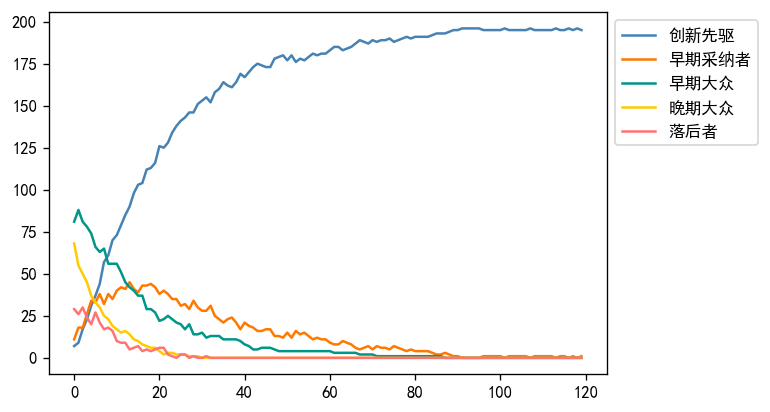

In [138]:
# 支持中文设置
plt.figure(dpi=120)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(range(120), one_model6["agent_type5"], "-", label='创新先驱', color="steelblue")
plt.plot(range(120), one_model6["agent_type4"], "-", label='早期采纳者', color="#ff7800")
plt.plot(range(120), one_model6["agent_type3"], "-", label='早期大众', color="#009688")
plt.plot(range(120), one_model6["agent_type2"], "-", label='晚期大众', color="#ffcb00")
plt.plot(range(120), one_model6["agent_type1"], "-", label='落后者', color="#ff7373")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

**系统参数分布情况**

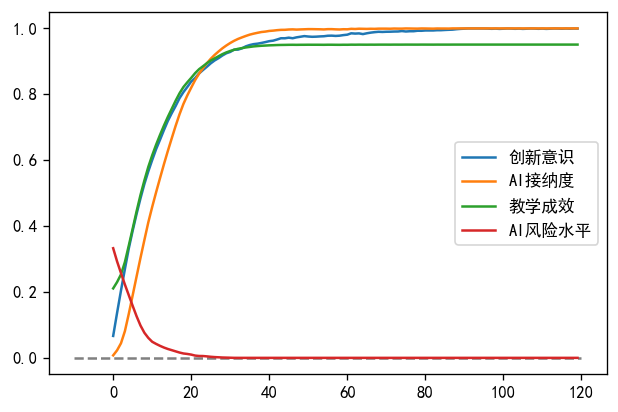

In [175]:
plt.figure(dpi=120)
plt.rcParams['axes.unicode_minus'] = False  #显示中文负号
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(range(120), one_model6["model_bs_ia"], label="创新意识")
plt.plot(range(120), one_model6["model_bs_ai_act"], label="AI接纳度")
plt.plot(range(120), one_model6["model_ai_te"], label="教学成效")
plt.plot(range(120), one_model6["model_bs_ai_alpha"], label="AI风险水平")
plt.hlines(y=0, xmin=-10, xmax=120, colors="grey", linestyles="--")
plt.legend()
plt.show()

### 4. 消极模式测试
在基本情况下，假定AI技术特征、学校创新氛围、风险容忍度、大众宣传渠道、教师培训等影响因素对AI教育变革的反应非常消极
```{python}
# 相对优势，兼容性，复杂性，可试性，可见性
ei_ai_f = [0.20,0.20,0.80,0.20,0.20]
ei_sia = -0.50
ei_srt = 0.20
ei_mass = 0.30
ei_tt = 0.10
```

In [124]:
fixed_params_model_7 = {
    # "n": 14,
    "ei_ai_f": [0.20, 0.20, 0.20, 0.82, 0.80],
    "ei_sia": -0.50,
    "ei_srt": 0.20,
    "ei_mass": 0.30,
    "ei_tt": 0.10,
}

variable_params_model_7 = {
    "n": [14]
}

batch_run_model_7 = BatchRunner(
    DIT4AI,
    fixed_parameters=fixed_params_model_7,
    variable_parameters=variable_params_model_7,
    iterations=10,
    max_steps=120,
    model_reporters={
        "model_final_bs_ia": model_final_bs_ia
    }
)

# batch_run_model_7.run_all()

10it [21:08, 126.84s/it]


In [125]:
model7_batch_result = batch_run_model_7.get_model_vars_dataframe()
model7_batch_result

,n,Run,model_final_bs_ia,ei_ai_f,ei_sia,ei_srt,ei_mass,ei_tt
0,14,0,-0.927756,"[0.2, 0.2, 0.2, 0.82, 0.8]",-0.5,0.2,0.3,0.1
1,14,1,-0.930730,"[0.2, 0.2, 0.2, 0.82, 0.8]",-0.5,0.2,0.3,0.1
2,14,2,-0.924720,"[0.2, 0.2, 0.2, 0.82, 0.8]",-0.5,0.2,0.3,0.1
3,14,3,-0.936712,"[0.2, 0.2, 0.2, 0.82, 0.8]",-0.5,0.2,0.3,0.1
4,14,4,-0.920408,"[0.2, 0.2, 0.2, 0.82, 0.8]",-0.5,0.2,0.3,0.1
5,14,5,-0.921266,"[0.2, 0.2, 0.2, 0.82, 0.8]",-0.5,0.2,0.3,0.1
6,14,6,-0.935635,"[0.2, 0.2, 0.2, 0.82, 0.8]",-0.5,0.2,0.3,0.1
7,14,7,-0.932728,"[0.2, 0.2, 0.2, 0.82, 0.8]",-0.5,0.2,0.3,0.1
8,14,8,-0.935266,"[0.2, 0.2, 0.2, 0.82, 0.8]",-0.5,0.2,0.3,0.1
9,14,9,-0.932117,"[0.2, 0.2, 0.2, 0.82, 0.8]",-0.5,0.2,0.3,0.1


**分析单次仿真情况**

In [135]:
one_model7 = batch_run_model_7.get_collector_model()[(14, 3)]
one_model7

,agent_type1,agent_type2,agent_type3,agent_type4,agent_type5,model_bs_ia,model_bs_ai_act,model_bs_ai_bi,model_bs_ai_alpha,model_ai_te
0,32,82,70,8,4,-0.081066,-0.052946,-0.056648,0.678120,-0.652681
1,37,86,62,8,3,-0.120214,-0.064810,-0.070523,0.694596,-0.643662
2,41,91,53,8,3,-0.157678,-0.076308,-0.084963,0.708844,-0.635623
3,56,90,42,5,3,-0.193539,-0.089581,-0.101916,0.721616,-0.631760
4,64,85,39,5,3,-0.226350,-0.105348,-0.122471,0.732617,-0.633617
...,...,...,...,...,...,...,...,...,...,...
115,187,7,2,0,0,-0.923981,-0.958714,-0.966869,0.933562,-0.972713
116,187,7,2,0,0,-0.925942,-0.959226,-0.967310,0.935007,-0.973066
117,187,7,2,0,0,-0.927575,-0.959861,-0.968054,0.936193,-0.973437
118,187,7,2,0,0,-0.930687,-0.960378,-0.968789,0.938564,-0.973764


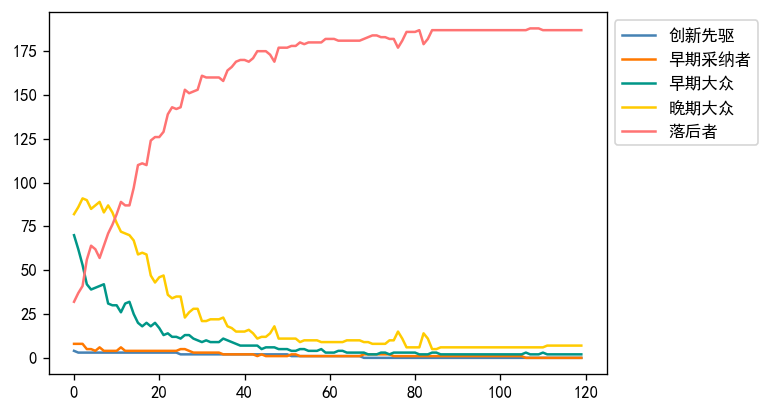

In [136]:
# 支持中文设置
plt.figure(dpi=120)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(range(120), one_model7["agent_type5"], "-", label='创新先驱', color="steelblue")
plt.plot(range(120), one_model7["agent_type4"], "-", label='早期采纳者', color="#ff7800")
plt.plot(range(120), one_model7["agent_type3"], "-", label='早期大众', color="#009688")
plt.plot(range(120), one_model7["agent_type2"], "-", label='晚期大众', color="#ffcb00")
plt.plot(range(120), one_model7["agent_type1"], "-", label='落后者', color="#ff7373")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

**系统参数分布情况**

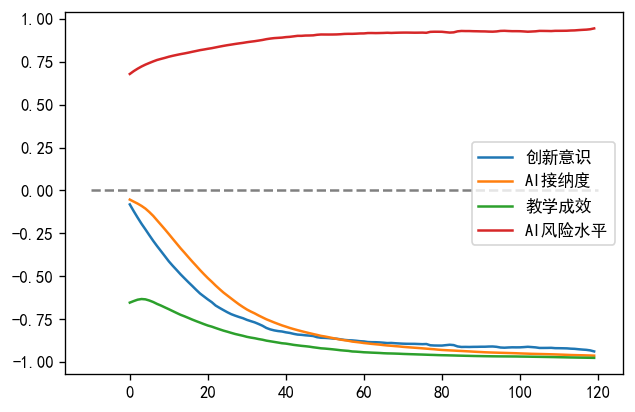

In [176]:
plt.figure(dpi=120)
plt.rcParams['axes.unicode_minus'] = False  #显示中文负号
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(range(120), one_model7["model_bs_ia"], label="创新意识")
plt.plot(range(120), one_model7["model_bs_ai_act"], label="AI接纳度")
plt.plot(range(120), one_model7["model_ai_te"], label="教学成效")
plt.plot(range(120), one_model7["model_bs_ai_alpha"], label="AI风险水平")
plt.hlines(y=0, xmin=-10, xmax=120, colors="grey", linestyles="--")
plt.legend()
plt.show()

### 5. 不同发展参数组合的比较分析
```{python}
# 相对优势，兼容性，复杂性，可试性，可见性
ei_ai_f = [0.20,0.20,0.80,0.20,0.20]
ei_sia = -0.50
ei_srt = 0.20
ei_mass = 0.30
ei_tt = 0.10
```

In [28]:
fixed_params_model_8 = {
    "n": 14,
    "ei_ai_f": [0.50, 0.50, 0.50, 0.50, 0.50],
    "ei_srt": 0.2,
    "ei_mass": 0.2
}

variable_params_model_8 = {
    "ei_sia": [0.00, 0.20, 0.40, 0.60],
    "ei_tt": [0.20, 0.40, 0.60, 0.80],
}

batch_run_model_8 = BatchRunner(
    DIT4AI,
    fixed_parameters=fixed_params_model_8,
    variable_parameters=variable_params_model_8,
    iterations=1,
    max_steps=120,
    model_reporters={
        "model_bs_ia": model_final_bs_ia,
        "model_bs_ai_act": model_final_bs_ai_act,
        "model_bs_ai_bi": model_final_bs_ai_bi,
        "model_bs_ai_alpha": model_final_bs_ai_alpha,
        "model_ai_te": model_final_ai_te
    }
)

In [29]:
batch_run_model_8.run_all()

16it [15:11, 56.99s/it]


In [30]:
model8_batch_result = batch_run_model_8.get_model_vars_dataframe()
model8_batch_result

,ei_tt,ei_sia,Run,model_ai_te,model_bs_ai_act,model_bs_ai_alpha,model_bs_ai_bi,model_bs_ia,n,ei_ai_f,ei_srt,ei_mass
0,0.0,0.2,0,-0.532903,-0.450359,0.575186,-0.470177,-0.433330,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.2,0.2
1,0.0,0.4,1,-0.507869,-0.430981,0.564389,-0.443310,-0.409088,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.2,0.2
2,0.0,0.6,2,-0.482288,-0.398615,0.562653,-0.416413,-0.398251,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.2,0.2
3,0.0,0.8,3,-0.485143,-0.395485,0.547744,-0.418458,-0.391022,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.2,0.2
4,0.2,0.2,4,-0.192832,-0.108410,0.393635,-0.114791,-0.104691,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.2,0.2
5,0.2,0.4,5,-0.210644,-0.130573,0.402941,-0.134898,-0.122330,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.2,0.2
6,0.2,0.6,6,-0.146904,-0.064796,0.398535,-0.067118,-0.077073,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.2,0.2
7,0.2,0.8,7,-0.104858,-0.008685,0.360319,-0.025786,-0.032381,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.2,0.2
8,0.4,0.2,8,0.183760,0.275548,0.235715,0.260239,0.246211,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.2,0.2
9,0.4,0.4,9,0.268322,0.369235,0.204539,0.360165,0.333957,14,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.2,0.2


In [ ]:
model8_batch_result = batch_run_model_8.get_model_vars_dataframe()
model8_batch_result

In [10]:
model8_batch_result

,ei_tt,ei_srt,ei_mass,ei_sia,Run,model_ai_te,model_bs_ai_act,model_bs_ai_alpha,model_bs_ai_bi,model_bs_ia,n,ei_ai_f
0,0.0,0.2,0.2,0.2,0,-0.654166,-0.587962,0.636544,-0.600656,-0.553240,14,"[0.5, 0.5, 0.5, 0.5, 0.5]"
1,0.0,0.2,0.2,0.4,1,-0.511109,-0.431576,0.578026,-0.447248,-0.420265,14,"[0.5, 0.5, 0.5, 0.5, 0.5]"
2,0.0,0.2,0.2,0.6,2,-0.482977,-0.401547,0.564758,-0.414838,-0.404529,14,"[0.5, 0.5, 0.5, 0.5, 0.5]"
3,0.0,0.2,0.2,0.8,3,-0.460482,-0.367399,0.556773,-0.393613,-0.383833,14,"[0.5, 0.5, 0.5, 0.5, 0.5]"
4,0.0,0.2,0.4,0.2,4,-0.506276,-0.423888,0.576450,-0.448802,-0.415469,14,"[0.5, 0.5, 0.5, 0.5, 0.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.6,0.8,0.6,0.8,251,0.936219,0.993093,0.000000,0.994726,0.980993,14,"[0.5, 0.5, 0.5, 0.5, 0.5]"
252,0.6,0.8,0.8,0.2,252,0.936043,0.992661,0.000000,0.993625,0.968738,14,"[0.5, 0.5, 0.5, 0.5, 0.5]"
253,0.6,0.8,0.8,0.4,253,0.936259,0.997380,0.000000,0.994332,0.980115,14,"[0.5, 0.5, 0.5, 0.5, 0.5]"
254,0.6,0.8,0.8,0.6,254,0.936282,0.992550,0.000000,0.994385,0.972979,14,"[0.5, 0.5, 0.5, 0.5, 0.5]"


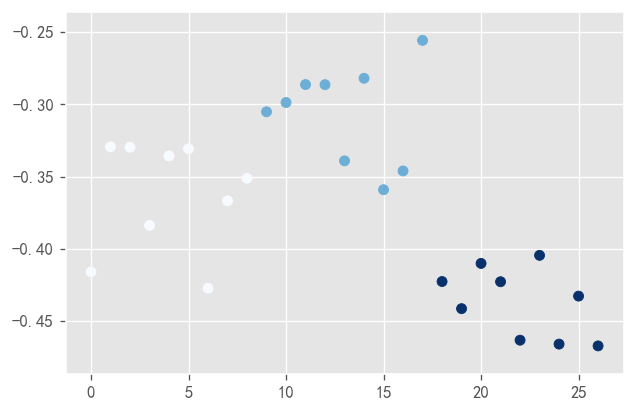

In [263]:
plt.figure(dpi=120)
plt.scatter(range(27), model8_ei_sia["model_bs_ia"], c=model8_ei_sia["ei_mass"], cmap="Blues")

### 6 不同参数组合的发展态势

In [14]:
model_c1 = DIT4AI(14, [0.62, 0.4, 0.6, 0.52, 0.43], 0.10, 0.2, 0.3, 0.3)
model_c2 = DIT4AI(14, [0.62, 0.40, 0.60, 0.52, 0.43], 0.25, 0.3, 0.30, 0.3)
model_c3 = DIT4AI(14, [0.62, 0.4, 0.6, 0.52, 0.43], 0.30, 0.3, 0.3, 0.4)
model_c4 = DIT4AI(14, [0.62, 0.4, 0.6, 0.52, 0.43], 0.35, 0.4, 0.4, 0.4)
model_c5 = DIT4AI(14, [0.62, 0.4, 0.6, 0.52, 0.43], 0.40, 0.4, 0.4, 0.5)
model_c6 = DIT4AI(14, [0.62, 0.4, 0.6, 0.52, 0.43], 0.50, 0.5, 0.5, 0.5)

In [15]:
for i in range(120):
    model_c1.step()

for i in range(120):
    model_c2.step()

for i in range(120):
    model_c3.step()

for i in range(120):
    model_c4.step()

for i in range(120):
    model_c5.step()

for i in range(120):
    model_c6.step()

In [12]:
model_c1_result = model_c1.datacollector.get_model_vars_dataframe()
model_c2_result = model_c2.datacollector.get_model_vars_dataframe()
model_c3_result = model_c3.datacollector.get_model_vars_dataframe()
model_c4_result = model_c4.datacollector.get_model_vars_dataframe()
model_c5_result = model_c5.datacollector.get_model_vars_dataframe()
model_c6_result = model_c6.datacollector.get_model_vars_dataframe()

In [23]:
# model_c1_result.to_csv("simulate_data/all1.csv")
# model_c2_result.to_csv("simulate_data/all2.csv")
# model_c3_result.to_csv("simulate_data/all3.csv")
# model_c4_result.to_csv("simulate_data/all4.csv")

In [2]:
# 读取数据
# import pandas as pd
# model_c1_result = pd.read_csv("simulate_data/all1.csv")
# model_c2_result = pd.read_csv("simulate_data/all2.csv")
# model_c3_result = pd.read_csv("simulate_data/all3.csv")
# model_c4_result = pd.read_csv("simulate_data/all4.csv")
# model_c5_result = pd.read_csv("simulate_data/all5.csv")
# model_c6_result = pd.read_csv("simulate_data/all6.csv")

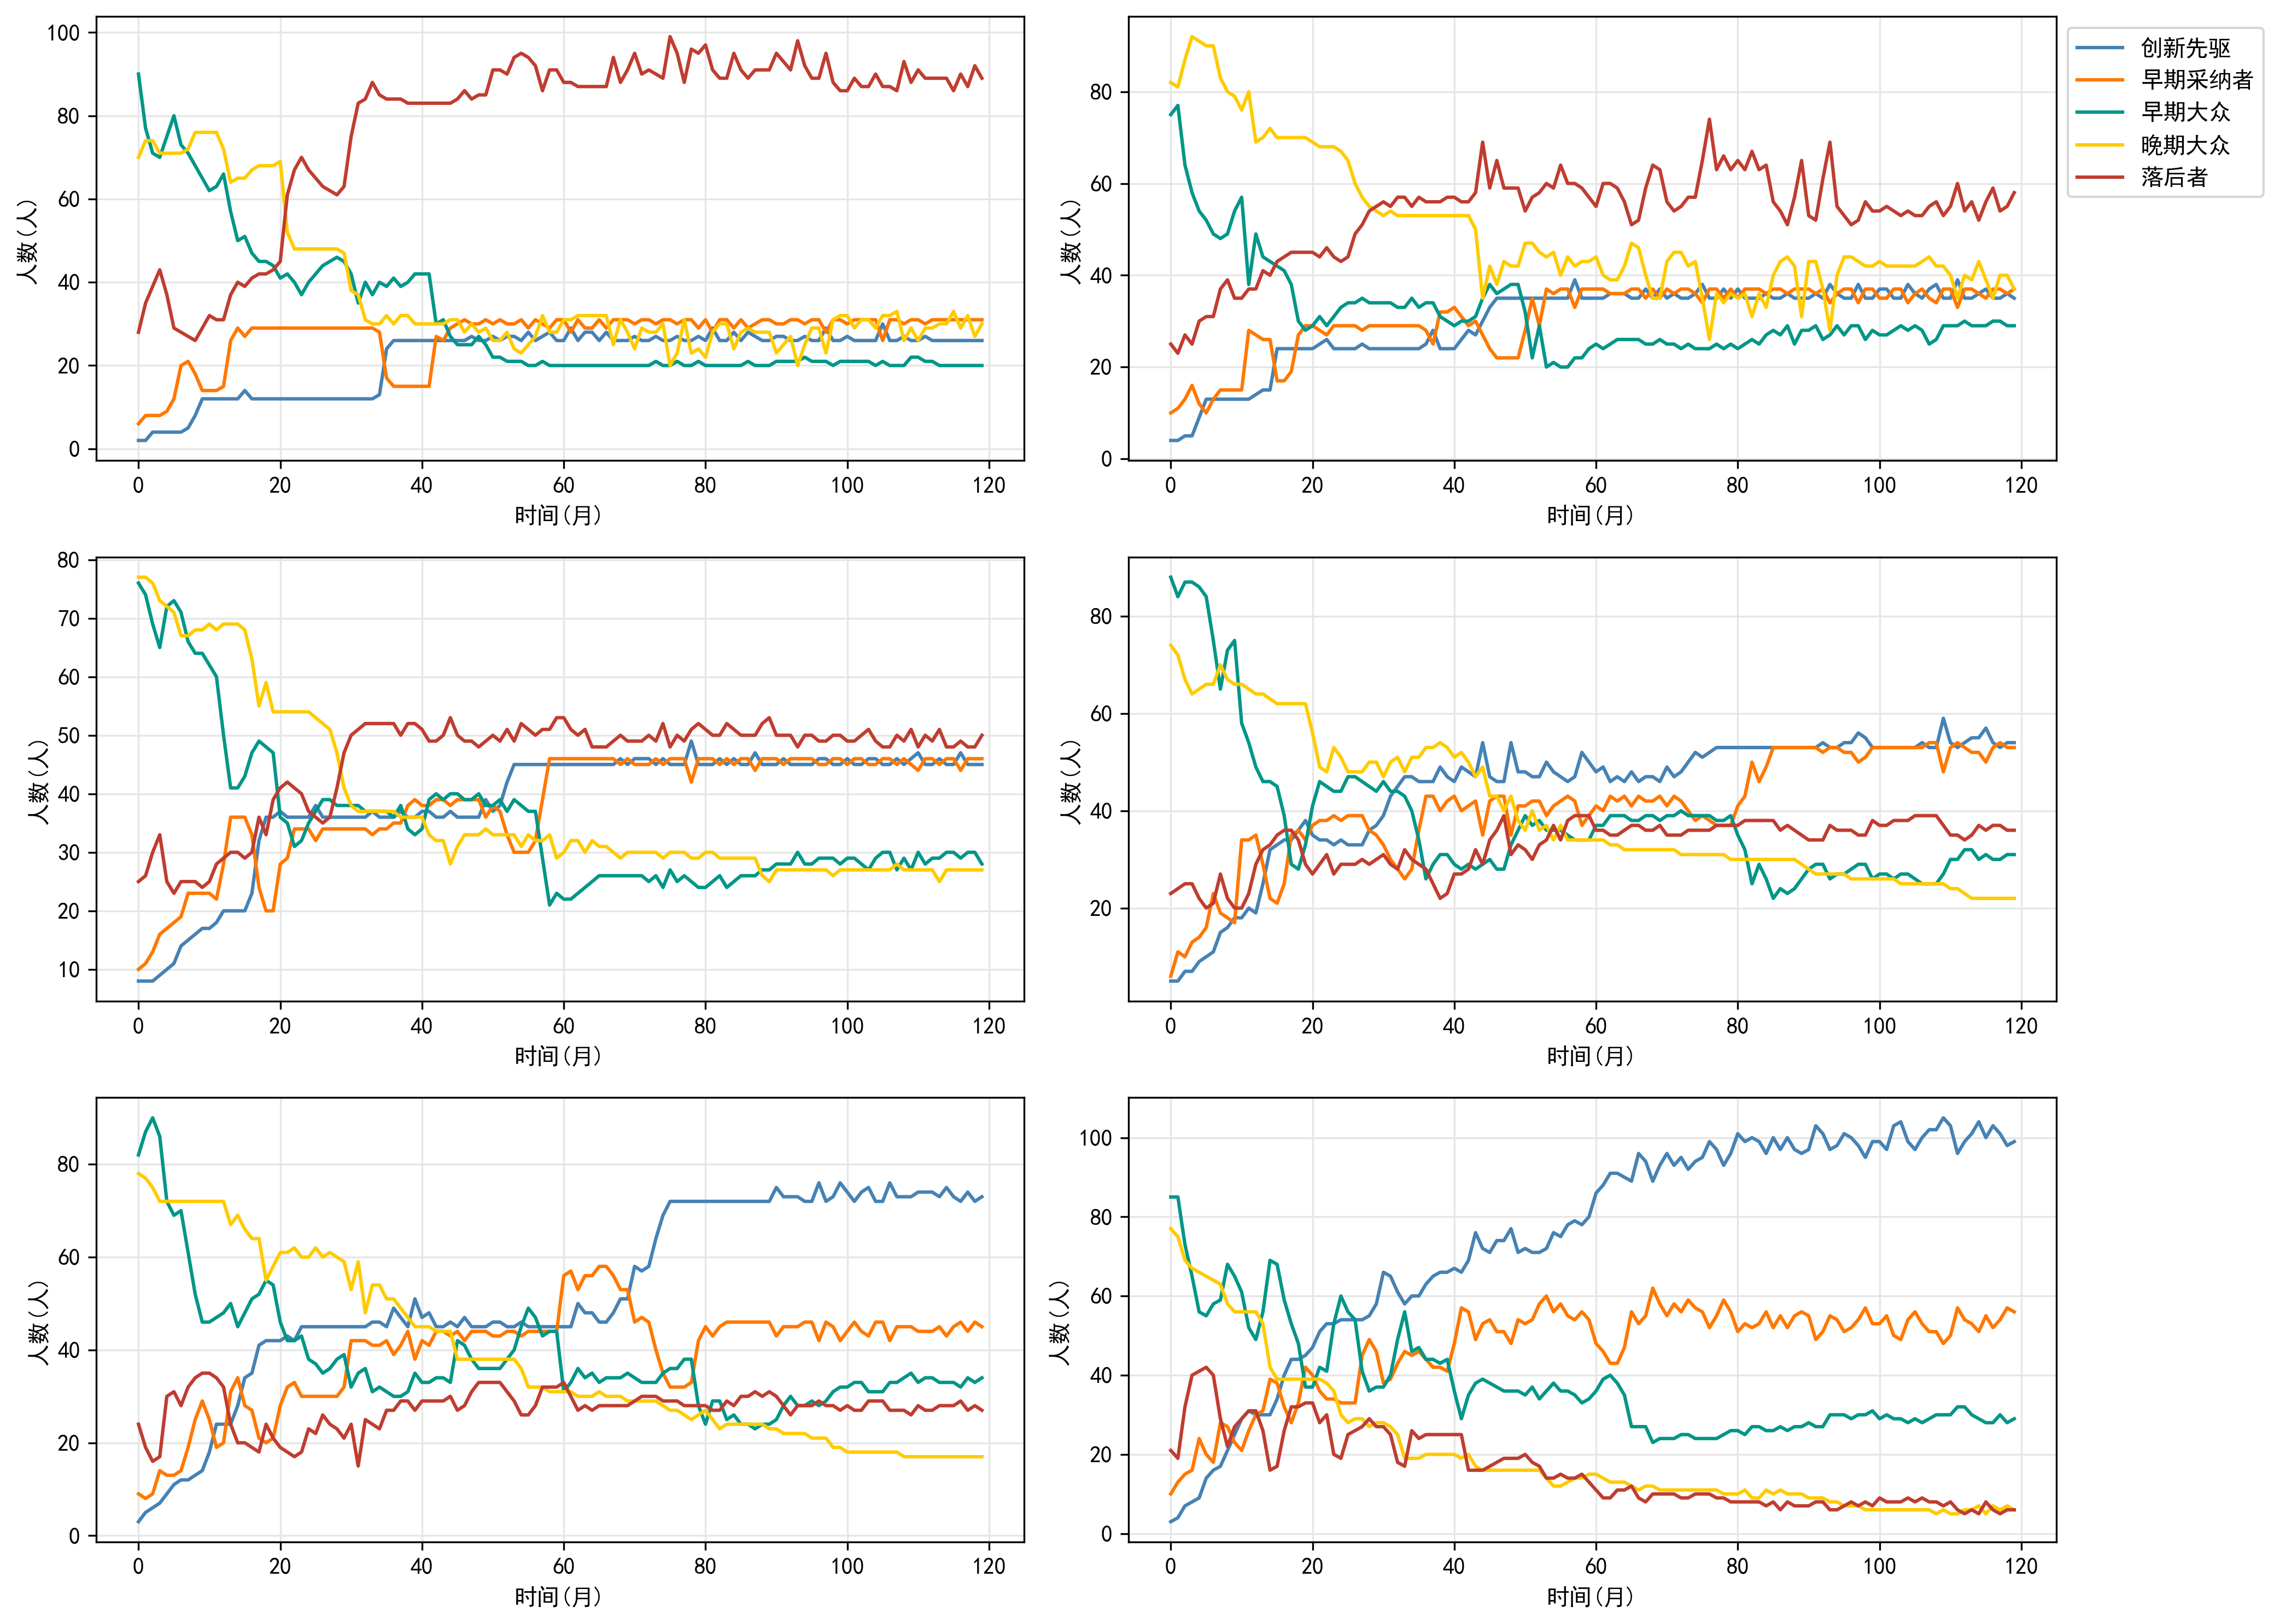

In [13]:
# print("系统创新氛围："+str(model9.ei_sia))
# 支持中文设置
plt.figure(figsize=(14, 10), dpi=300)
plt.rcParams['font.sans-serif'] = ['SimHei']
all_color = "#E6E6E6"

ax1 = plt.subplot(321)
ax1.plot(range(120), model_c1_result["agent_type5"], "-", label='创新先驱', color="steelblue")
ax1.plot(range(120), model_c1_result["agent_type4"], "-", label='早期采纳者', color="#ff7800")
ax1.plot(range(120), model_c1_result["agent_type3"], "-", label='早期大众', color="#009688")
ax1.plot(range(120), model_c1_result["agent_type2"], "-", label='晚期大众', color="#ffcb00")
ax1.plot(range(120), model_c1_result["agent_type1"], "-", label='落后者', color="#BF3D30")
plt.xlabel("时间(月)", color="Black")
plt.ylabel("人数(人)", color="Black")
plt.grid(color=all_color)

ax2 = plt.subplot(322)
ax2.plot(range(120), model_c2_result["agent_type5"], "-", label='创新先驱', color="steelblue")
ax2.plot(range(120), model_c2_result["agent_type4"], "-", label='早期采纳者', color="#ff7800")
ax2.plot(range(120), model_c2_result["agent_type3"], "-", label='早期大众', color="#009688")
ax2.plot(range(120), model_c2_result["agent_type2"], "-", label='晚期大众', color="#ffcb00")
ax2.plot(range(120), model_c2_result["agent_type1"], "-", label='落后者', color="#BF3D30")
ax2.legend(bbox_to_anchor=(1, 1))
plt.xlabel("时间(月)", color="Black")
plt.ylabel("人数(人)", color="Black")
plt.grid(color=all_color)

ax3 = plt.subplot(323)
ax3.plot(range(120), model_c3_result["agent_type5"], "-", label='创新先驱', color="steelblue")
ax3.plot(range(120), model_c3_result["agent_type4"], "-", label='早期采纳者', color="#ff7800")
ax3.plot(range(120), model_c3_result["agent_type3"], "-", label='早期大众', color="#009688")
ax3.plot(range(120), model_c3_result["agent_type2"], "-", label='晚期大众', color="#ffcb00")
ax3.plot(range(120), model_c3_result["agent_type1"], "-", label='落后者', color="#BF3D30")
plt.xlabel("时间(月)", color="Black")
plt.ylabel("人数(人)", color="Black")
plt.grid(color=all_color)

ax4 = plt.subplot(324)
ax4.plot(range(120), model_c4_result["agent_type5"], "-", label='创新先驱', color="steelblue")
ax4.plot(range(120), model_c4_result["agent_type4"], "-", label='早期采纳者', color="#ff7800")
ax4.plot(range(120), model_c4_result["agent_type3"], "-", label='早期大众', color="#009688")
ax4.plot(range(120), model_c4_result["agent_type2"], "-", label='晚期大众', color="#ffcb00")
ax4.plot(range(120), model_c4_result["agent_type1"], "-", label='落后者', color="#BF3D30")
plt.xlabel("时间(月)", color="Black")
plt.ylabel("人数(人)", color="Black")
plt.grid(color=all_color)

ax5 = plt.subplot(325)
ax5.plot(range(120), model_c5_result["agent_type5"], "-", label='创新先驱', color="steelblue")
ax5.plot(range(120), model_c5_result["agent_type4"], "-", label='早期采纳者', color="#ff7800")
ax5.plot(range(120), model_c5_result["agent_type3"], "-", label='早期大众', color="#009688")
ax5.plot(range(120), model_c5_result["agent_type2"], "-", label='晚期大众', color="#ffcb00")
ax5.plot(range(120), model_c5_result["agent_type1"], "-", label='落后者', color="#BF3D30")
plt.xlabel("时间(月)", color="Black")
plt.ylabel("人数(人)", color="Black")
plt.grid(color=all_color)

ax6 = plt.subplot(326)
ax6.plot(range(120), model_c6_result["agent_type5"], "-", label='创新先驱', color="steelblue")
ax6.plot(range(120), model_c6_result["agent_type4"], "-", label='早期采纳者', color="#ff7800")
ax6.plot(range(120), model_c6_result["agent_type3"], "-", label='早期大众', color="#009688")
ax6.plot(range(120), model_c6_result["agent_type2"], "-", label='晚期大众', color="#ffcb00")
ax6.plot(range(120), model_c6_result["agent_type1"], "-", label='落后者', color="#BF3D30")
plt.xlabel("时间(月)", color="Black")
plt.ylabel("人数(人)", color="Black")
plt.grid(color=all_color)

plt.tight_layout()
# plt.savefig('images/all6.png')